In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
train=pd.read_csv("../data/train.csv")
test=pd.read_csv("../data/test.csv")

In [3]:
train.shape,test.shape

((1600, 3), (5001, 3))

In [4]:
train.head(10)

,id,review,sentiment
0,1861,A masterpiece! Highly recommend it.,1
1,354,The characters were flat and uninteresting.,0
2,1334,Awful visuals and horrible sound quality.,0
3,906,"What a fantastic experience, I enjoyed every m...",1
4,1290,I couldn't stop smiling while watching.,1
5,1274,I absolutely loved this movie!,1
6,939,I couldn't stop smiling while watching.,1
7,1732,"Such a heartwarming film, loved it.",1
8,66,"What a fantastic experience, I enjoyed every m...",1
9,1324,I absolutely loved this movie!,1


In [5]:
test.head(10)

,id,review,usage
0,5000,Complete waste of time.,Private
1,5001,Disappointing from start to end.,Public
2,5002,Terribly boring and predictable.,Private
3,5003,Complete waste of time.,Public
4,5004,Complete waste of time.,Private
5,5005,Highly recommended to everyone.,Public
6,5006,Absolutely loved it!,Private
7,5007,Painfully slow and dull.,Public
8,5008,Disappointing from start to end.,Private
9,5009,A masterpiece of storytelling.,Public


In [6]:
train.isna().sum()

id           0
review       0
sentiment    0
dtype: int64

In [7]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1595    False
1596    False
1597    False
1598    False
1599    False
Length: 1600, dtype: bool

<Axes: xlabel='sentiment', ylabel='review'>

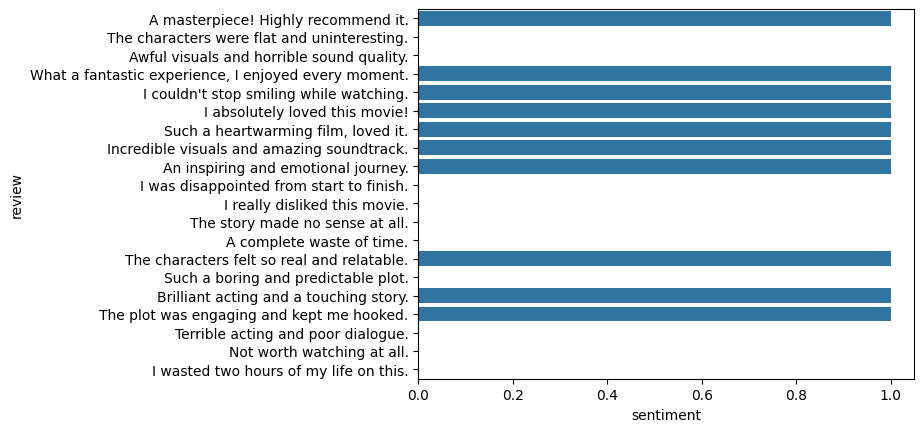

In [8]:
sns.barplot(data=train,x=train.sentiment,y=train.review)

In [9]:
import re
def clean_text(text):
    text=text.lower()
    text=re.sub(r"[^a-z\s]","",text)
    return (text)
train['review']=train['review'].apply(clean_text)
test['review']=test['review'].apply(clean_text)

In [11]:
preprocessor=ColumnTransformer(transformers=[
    ('review',TfidfVectorizer(),'review')
])
pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',MultinomialNB())
])

In [12]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('review', TfidfVectorizer(),
                                                  'review')])),
                ('classifier', MultinomialNB())])

In [13]:
X=train[['review']]
y=train[['sentiment']]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1200, 1), (400, 1), (1200, 1), (400, 1))

In [15]:
pipeline.fit(X_train,y_train)
predict=pipeline.predict(X_test)
print("classification report",classification_report(y_test,predict))
print("accuracy score",accuracy_score(y_test,predict))
main_predict=pipeline.predict(test)

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00       204

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

accuracy score 1.0


c:\Users\fadis\venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
submission=pd.DataFrame({
    'id':test.id,
    'sentiment':main_predict
})
submission.to_csv("../predictions/predictions.csv",index=False)

In [17]:
submission

,id,sentiment
0,5000,0
1,5001,0
2,5002,0
3,5003,0
4,5004,0
...,...,...
4996,9996,1
4997,9997,0
4998,9998,1
4999,9999,0
